# Exploratory Data Analysis

## 1. Problem Statement


*    Ho : Users are not more likely to borrow cars in January compared to June.
*    H1 : Users are more likely to borrow cars in January compared to June.



### a) Specifying the Data Analytic Question

> To determine relationship between age and the positive lymph nodes among cancer patients.

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Data Description

In [ ]:
# Loading the Data from the source

#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy.stats import shapiro 

from scipy.stats import normaltest
from scipy.stats import anderson
import scipy.stats as stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

df = pd.read_csv('https://bit.ly/DSCoreAutolibDataset')

### Checking the Data

In [ ]:
# Determining the no. of records in our dataset
df.shape

(16085, 13)

In [ ]:
# Previewing the top of our dataset
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# Previewing the bottom of our dataset
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
# Checking whether each column has an appropriate datatype
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

### Tidying the Dataset

In [ ]:
# Counting data in the columns

df.count()

Postal code               16085
date                      16085
n_daily_data_points       16085
dayOfWeek                 16085
day_type                  16085
BlueCars_taken_sum        16085
BlueCars_returned_sum     16085
Utilib_taken_sum          16085
Utilib_returned_sum       16085
Utilib_14_taken_sum       16085
Utilib_14_returned_sum    16085
Slots_freed_sum           16085
Slots_taken_sum           16085
dtype: int64

In [ ]:
# Counting all null data in the dataset

np.count_nonzero(df.isnull())

0

In [ ]:
df.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [ ]:
# Standardized column names

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.columns.values.tolist()

['postal_code',
 'date',
 'n_daily_data_points',
 'dayofweek',
 'day_type',
 'bluecars_taken_sum',
 'bluecars_returned_sum',
 'utilib_taken_sum',
 'utilib_returned_sum',
 'utilib_14_taken_sum',
 'utilib_14_returned_sum',
 'slots_freed_sum',
 'slots_taken_sum']

In [ ]:
df.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# Checking for duplicates

df.duplicated().sum()

0

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   postal_code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayofweek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   bluecars_taken_sum      16085 non-null  int64 
 6   bluecars_returned_sum   16085 non-null  int64 
 7   utilib_taken_sum        16085 non-null  int64 
 8   utilib_returned_sum     16085 non-null  int64 
 9   utilib_14_taken_sum     16085 non-null  int64 
 10  utilib_14_returned_sum  16085 non-null  int64 
 11  slots_freed_sum         16085 non-null  int64 
 12  slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [ ]:
# Converting data data type "object"  to "date time"

df.date = pd.to_datetime(df.date)

In [ ]:
# Verifying change

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   postal_code             16085 non-null  int64         
 1   date                    16085 non-null  datetime64[ns]
 2   n_daily_data_points     16085 non-null  int64         
 3   dayofweek               16085 non-null  int64         
 4   day_type                16085 non-null  object        
 5   bluecars_taken_sum      16085 non-null  int64         
 6   bluecars_returned_sum   16085 non-null  int64         
 7   utilib_taken_sum        16085 non-null  int64         
 8   utilib_returned_sum     16085 non-null  int64         
 9   utilib_14_taken_sum     16085 non-null  int64         
 10  utilib_14_returned_sum  16085 non-null  int64         
 11  slots_freed_sum         16085 non-null  int64         
 12  slots_taken_sum         16085 non-null  int64 

In [ ]:
df.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

In [ ]:
df.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum,year,month
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20,2018,1
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22,2018,1
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27,2018,1
3,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21,2018,1
4,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20,2018,1


In [ ]:
df.nunique()

postal_code               104
date                      156
n_daily_data_points        23
dayofweek                   7
day_type                    2
bluecars_taken_sum        932
bluecars_returned_sum     929
utilib_taken_sum           48
utilib_returned_sum        49
utilib_14_taken_sum        92
utilib_14_returned_sum     94
slots_freed_sum           297
slots_taken_sum           301
year                        1
month                       6
dtype: int64

In [ ]:
df["bluecars_taken_sum"].groupby(df['month']).sum()

month
1    403174
2    309708
3    405231
4    385103
5    264814
6    257505
Name: bluecars_taken_sum, dtype: int64

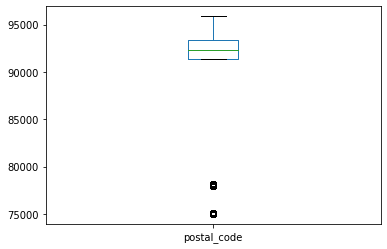

In [ ]:
df.boxplot(column =['postal_code'], grid = False) 
plt.show()

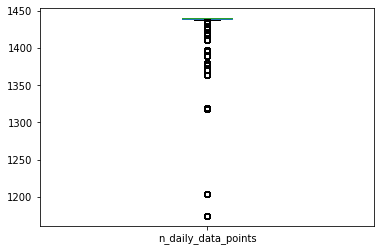

In [ ]:
df.boxplot(column =['n_daily_data_points'], grid = False)
plt.show()

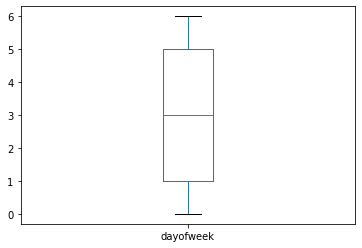

In [ ]:
df.boxplot(column =['dayofweek'], grid = False) 

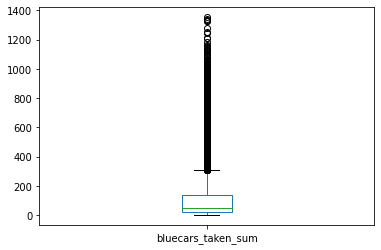

In [ ]:
df.boxplot(column =['bluecars_taken_sum'], grid = False) 

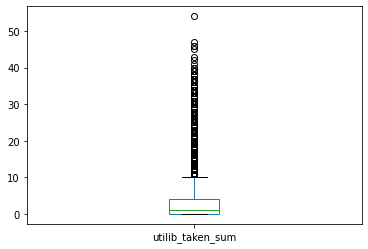

In [ ]:
df.boxplot(column =['utilib_taken_sum'], grid = False) 

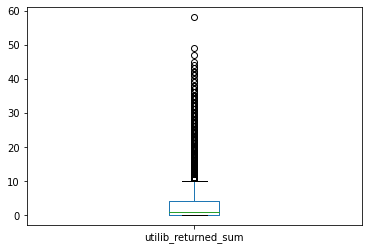

In [ ]:
df.boxplot(column =['utilib_returned_sum'], grid = False) 

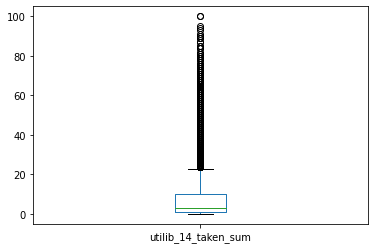

In [ ]:
df.boxplot(column =['utilib_14_taken_sum'], grid = False) 

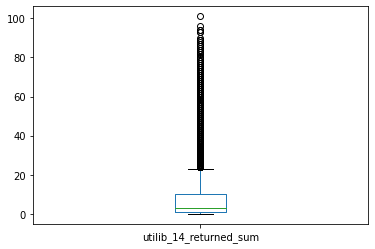

In [ ]:
df.boxplot(column =['utilib_14_returned_sum'], grid = False) 

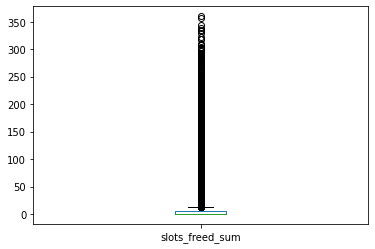

In [ ]:
df.boxplot(column =['slots_freed_sum'], grid = False) 

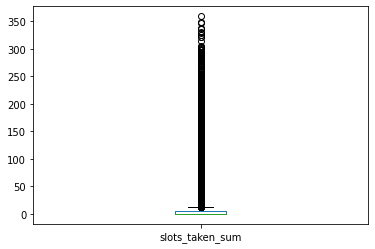

In [ ]:
df.boxplot(column =['slots_taken_sum'], grid = False) 

In [ ]:
df.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum', 'year', 'month'],
      dtype='object')

In [ ]:
# Dropping unnecessary columns 
# 
df.drop(['n_daily_data_points','utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],axis=1,inplace=True)

In [ ]:
df.shape

(16085, 8)

In [ ]:
df.head()

,postal_code,date,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,year,month
0,75001,2018-01-01,0,weekday,110,103,2018,1
1,75001,2018-01-02,1,weekday,98,94,2018,1
2,75001,2018-01-03,2,weekday,138,139,2018,1
3,75001,2018-01-04,3,weekday,104,104,2018,1
4,75001,2018-01-05,4,weekday,114,117,2018,1


### Exploratory Analysis


#### Univariate Analysis

In [ ]:
print("Median : ", df["postal_code"].median())
print("Max : ", df["postal_code"].max())
print("Min : ", df["postal_code"].min())


Median :  92340.0
Max :  95880
Min :  75001


In [ ]:
df.postal_code.value_counts(ascending=False)

94130    156
92310    156
78140    156
94700    156
95100    156
        ... 
93150    151
93370    149
92340    147
93200    126
93390     84
Name: postal_code, Length: 104, dtype: int64

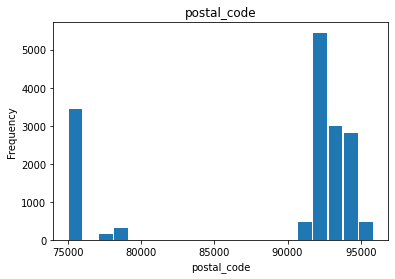

In [ ]:
# This variable is a continuous numerical data, so we  will use a histogram to visualize data.

df.postal_code.plot.hist( bins= 20,  rwidth=0.9)

plt.title('postal_code')

# Labelling our x axis
plt.xlabel('postal_code')

# Displaying
plt.show()

In [ ]:
df["bluecars_taken_sum"].groupby(df['postal_code']).sum()

postal_code
75001    20995
75002    27143
75003    37188
75004    31454
75005    47766
         ...  
94700     5288
94800    12486
95100     3743
95870     2378
95880     2488
Name: bluecars_taken_sum, Length: 104, dtype: int64

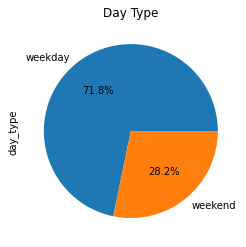

In [ ]:
# The variable "country" is a categorical nominal data, so we  will use a pie chart to visualize data.

df.day_type.value_counts().plot.pie(autopct='%1.1f%%')

plt.title('Day Type')

# Displaying
plt.show()

In [ ]:
len(df[df['day_type'].str.contains('weekend')])

4541

In [ ]:
len(df[df['day_type'].str.contains('weekday')])

11544

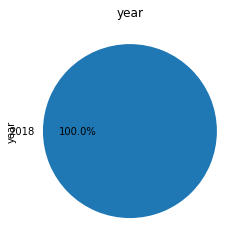

In [ ]:
# The variable "country" is a categorical nominal data, so we  will use a pie chart to visualize data.

df.year.value_counts().plot.pie(autopct='%1.1f%%')

plt.title('year')

# Displaying
plt.show()

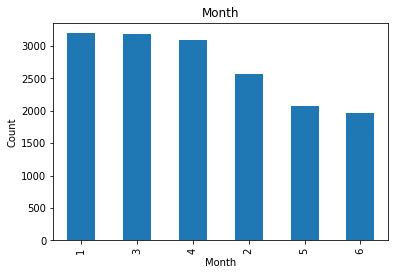

In [ ]:
# This variable is a categorical ordinal data, so we  will use a bar chart to visualize data.

df.month.value_counts().plot.bar()

plt.title('Month')

# Labelling our y axis
plt.ylabel('Count')

# Labelling our x axis
plt.xlabel('Month')

# Displaying
plt.show()

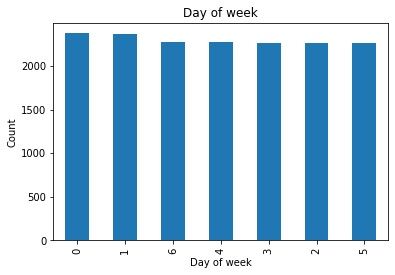

In [ ]:
# This variable is a categorical ordinal data, so we  will use a bar chart to visualize data.

df.dayofweek.value_counts().plot.bar()

plt.title('Day of week')

# Labelling our y axis
plt.ylabel('Count')

# Labelling our x axis
plt.xlabel('Day of week')

# Displaying
plt.show()

###### **bluecars_taken_sum**

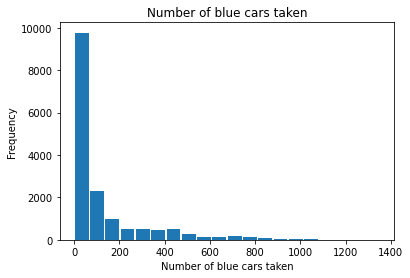

In [ ]:
# This variable is a continuous numerical data, so we  will use a histogram to visualize data.

df.bluecars_taken_sum.plot.hist( bins= 20,  rwidth=0.9)

plt.title('Number of blue cars taken')

# Labelling our x axis
plt.xlabel('Number of blue cars taken')

# Displaying
plt.show()

In [ ]:
# Finding the mean and standard deviation

print("The average number of cars taken : ", df["bluecars_taken_sum"].mean(), "with a standard deviation of : ", df["bluecars_taken_sum"].std())
print("The highest number of cars taken : ", df["bluecars_taken_sum"].max())
print("The lowest number of cars taken : ", df["bluecars_taken_sum"].min())


The average number of cars taken :  125.92695057506994 with a standard deviation of :  185.42657876727893
The highest number of cars taken :  1352
The lowest number of cars taken :  0


In [ ]:
# Calculating the quartiles
df["bluecars_taken_sum"].quantile([0.25,0.50,0.75])

# 0.50 quartile should have been 125!!

0.25     20.0
0.50     46.0
0.75    135.0
Name: bluecars_taken_sum, dtype: float64

In [ ]:
# Calculating the skewness
print("Skewness is : ", df["bluecars_taken_sum"].skew())

# The data is postively skewed implying that the mean is greater than the mode.

Skewness is :  2.4063548974959086


In [ ]:
# Calculating the kurtosis

df["bluecars_taken_sum"].kurt()

# The kurtosis is greater than zero, so the distribution has heavier tails and is called a leptokurtic distribution.
# This implies that the data contains outliers.


6.172692305510042

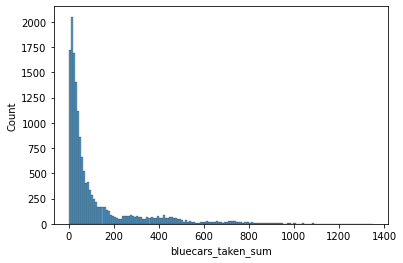

In [ ]:
sns.histplot(data=df, x='bluecars_taken_sum')

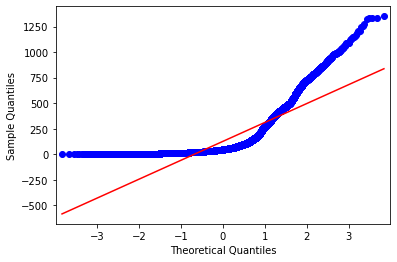

In [ ]:
qqplot(df['bluecars_taken_sum'], line='s')
pyplot.show()

In [ ]:
# The Shapiro-Wilk test for normality
stat, p = shapiro(df['bluecars_taken_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
 
# Since the p-value is small, we reject the null hypothesis 
# that the data is normally distributed. Therefore, we need to use a non-parametric test

Statistics=0.661, p=0.000
Sample does not look Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# D’Agostino’s K^2 normality test for normality
stat, p = normaltest(df['bluecars_taken_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=7874.450, p=0.000
Sample does not look Gaussian


###### **bluecars_returned_sum**

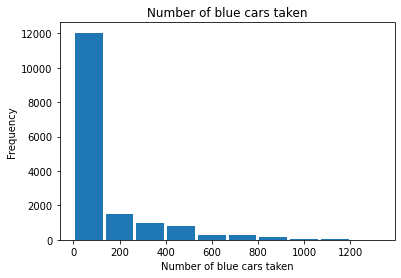

In [ ]:
# This variable is a continuous numerical data, so we  will use a histogram to visualize data.

df.bluecars_returned_sum.plot.hist( bins= 10,  rwidth=0.9)

plt.title('Number of blue cars taken')

# Labelling our x axis
plt.xlabel('Number of blue cars taken')

# Displaying
plt.show()

In [ ]:
# Finding the mean and standard deviation

print("The average number of people living in one house is : ", df["bluecars_returned_sum"].mean(), "with a standard deviation of : ", df["bluecars_returned_sum"].std())
print("The highest number of people living in one house : ", df["bluecars_returned_sum"].max())
print("The lowest number of people living in one house : ", df["bluecars_returned_sum"].min())


The average number of people living in one house is :  125.912713708424 with a standard deviation of :  185.50153480148427
The highest number of people living in one house :  1332
The lowest number of people living in one house :  0


In [ ]:
# Calculating the quartiles
df["bluecars_returned_sum"].quantile([0.25,0.5,0.75])

0.25     20.0
0.50     46.0
0.75    135.0
Name: bluecars_returned_sum, dtype: float64

In [ ]:
# Calculating the skewness
print("Skewness is : ", df["bluecars_returned_sum"].skew())

# The data is postively skewed implying that the mean is greater than the mode.

Skewness is :  2.412084978838923


In [ ]:
# Calculating the kurtosis

df["bluecars_returned_sum"].kurt()

# The kurtosis is greater than zero, so the distribution has heavier tails and is called a leptokurtic distribution.
# This implies that the data contains outliers.


6.1862880957582345

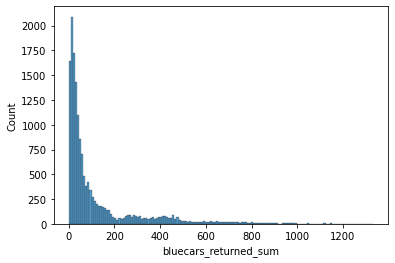

In [ ]:
sns.histplot(data=df, x='bluecars_returned_sum')

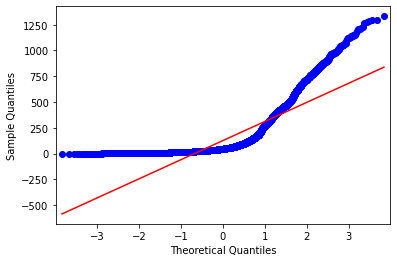

In [ ]:
qqplot(df['bluecars_returned_sum'], line='s')
pyplot.show()

In [ ]:
# The Shapiro-Wilk test for normality
stat, p = shapiro(df['bluecars_returned_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.660, p=0.000
Sample does not look Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# D’Agostino’s K^2 normality test for normality
stat, p = normaltest(df['bluecars_returned_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=7892.191, p=0.000
Sample does not look Gaussian


#### Bivariate Analysis

In [ ]:
month_cars_taken_df = df["bluecars_taken_sum"].groupby(df['month']).sum()
month_cars_taken_df

month
1    403174
2    309708
3    405231
4    385103
5    264814
6    257505
Name: bluecars_taken_sum, dtype: int64

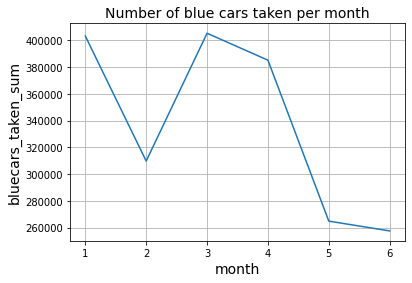

In [ ]:
plt.plot(month_cars_taken_df)
plt.title('Number of blue cars taken per month', fontsize=14)
plt.xlabel('month', fontsize=14)
plt.ylabel("bluecars_taken_sum", fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
month_cars_returned_df = df["bluecars_returned_sum"].groupby(df['month']).sum()
month_cars_returned_df

month
1    403301
2    309449
3    405480
4    384811
5    264499
6    257766
Name: bluecars_returned_sum, dtype: int64

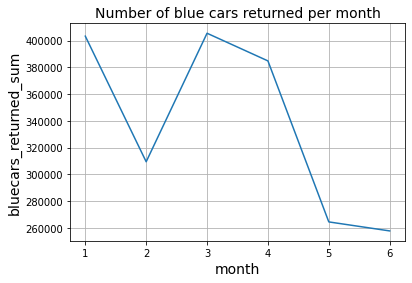

In [ ]:
plt.plot(month_cars_returned_df)
plt.title('Number of blue cars returned per month', fontsize=14)
plt.xlabel('month', fontsize=14)
plt.ylabel("bluecars_returned_sum", fontsize=14)
plt.grid(True)
plt.show()

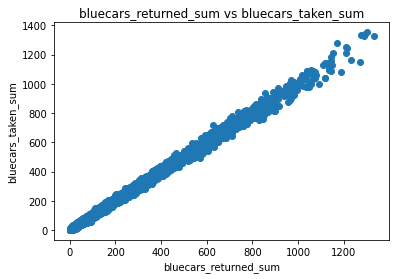

In [ ]:
# Plotting a scatterplot
plt.scatter(df['bluecars_returned_sum'], df['bluecars_taken_sum'])

# Giving our scatterplot a title
plt.title('bluecars_returned_sum vs bluecars_taken_sum')

# Labelling our x axis
plt.xlabel('bluecars_returned_sum')

# Labelling our y axis
plt.ylabel('bluecars_taken_sum')

# Displaying our scatterplot
plt.show()

# There is positive relation between the number of cars taken and returned.

In [ ]:
# Calculating the pearson coefficient
pearson_coeff = df["bluecars_returned_sum"].corr(df["bluecars_taken_sum"], method="pearson") 
print(pearson_coeff)

# The Pearson coefficient shows a strong positive correlation between these two variables.

0.9986597051672199


## 3. Hypothesis Testing Procedure

Ho : There is no difference between the number of Blue electric cars borrowed during weekdays in  January compared to May.

H1 :There is a difference between the number of Blue electric cars borrowed during weekdays in  January compared to May.


In [ ]:
# For the hypothesis testing, we will only be invesgating data for weekdays

df_weekday = df[df['day_type'] == "weekday"]

In [ ]:
# Verifying data

df_weekday.nunique()

postal_code              104
date                     112
dayofweek                  5
day_type                   1
bluecars_taken_sum       789
bluecars_returned_sum    781
year                       1
month                      6
dtype: int64

In [ ]:
df_weekday.head()

,postal_code,date,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,year,month
0,75001,2018-01-01,0,weekday,110,103,2018,1
1,75001,2018-01-02,1,weekday,98,94,2018,1
2,75001,2018-01-03,2,weekday,138,139,2018,1
3,75001,2018-01-04,3,weekday,104,104,2018,1
4,75001,2018-01-05,4,weekday,114,117,2018,1


Significance Level  $\alpha = 0.05$

95% confidence level

In [ ]:
# Data for January only

Januarydf = df_weekday.loc[(df.month == 1)] 
Januarydf.describe()

,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum,year,month
count,2369.000000,2369.000000,2369.000000,2369.000000,2369.0,2369.0
mean,88785.295061,1.869565,114.323343,113.953989,2018.0,1.0
std,7652.053377,1.392350,165.206260,164.105841,0.0,0.0
min,75001.000000,0.000000,0.000000,0.000000,2018.0,1.0
25%,91330.000000,1.000000,18.000000,18.000000,2018.0,1.0
50%,92340.000000,2.000000,42.000000,43.000000,2018.0,1.0
75%,93400.000000,3.000000,120.000000,122.000000,2018.0,1.0
max,95880.000000,4.000000,963.000000,952.000000,2018.0,1.0


In [ ]:
# The Shapiro-Wilk test for normality
stat, p = shapiro(Januarydf['bluecars_taken_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
 
# Since the p-value is small, we reject the null hypothesis 
# that the data is normally distributed. Therefore, we need to use a non-parametric test

Statistics=0.670, p=0.000
Sample does not look Gaussian


In [ ]:
# Data for March only

Maydf = df_weekday.loc[(df.month == 5)] 
Maydf.describe()

,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum,year,month
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.0,1558.0
mean,88822.419769,1.802311,121.742619,121.320282,2018.0,5.0
std,7631.648531,1.326357,176.686765,175.161299,0.0,0.0
min,75001.000000,0.000000,0.000000,1.000000,2018.0,5.0
25%,91340.000000,1.000000,20.000000,20.000000,2018.0,5.0
50%,92340.000000,2.000000,45.000000,45.500000,2018.0,5.0
75%,93390.000000,3.000000,135.000000,136.000000,2018.0,5.0
max,95880.000000,4.000000,1043.000000,1032.000000,2018.0,5.0


In [ ]:
# The Shapiro-Wilk test for normality
stat, p = shapiro(Maydf['bluecars_taken_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
 
# Since the p-value is small, we reject the null hypothesis 
# that the data is normally distributed. Therefore, we need to use a non-parametric test

Statistics=0.666, p=0.000
Sample does not look Gaussian


Based on these results, the appropriate statistical test is the Mann-Whitney rank test to compare medians. We will carry out a one tail test.

In [ ]:
## from scipy.stats

stats.mannwhitneyu(Januarydf['bluecars_taken_sum'],Maydf['bluecars_taken_sum'])

MannwhitneyuResult(statistic=1791428.0, pvalue=0.06005751838433424)

p-value > 0.05, so we **cannot reject the Null Hypothesis.**

## 4. Hypothesis Testing Results

The Q-Q plots along with Shapiro-Wilk test for normality showed that the number of cars borrowed is not normal.

So, we carried out a one tail Mann-Whitney rank test to compare medians. 

The p-value obtained was 0.06 which is greater than 0.05. so we **cannot reject the Null Hypothesis. We cannot say that there is a difference between the number of cars borrowed in  January compared to May.**

## 5. Discussion of Test Sensitivity 

If you conducted a test on a parameter (e.g., m, p, s), then you might comment on the following:  the practical significance of the finding in the event that your null hypothesis is rejected and the power of the test (1-ß) for the given alpha level and sample size, and the effect of changing the sample size.


If you conducted the goodness of fit test, comment on the effect of different bin sizes, different numbers of bins, and different estimates of the parameters of the hypothesized model.


## 6. Summary and Conclusions

Summarize the process of the project.


Provide the concluding statement concerning the hypothesis, the results, and the sensitivity of the testing.
